# Home assignment 6

(deadline 27.02.2022 15:00 MSK)

Please, rename the Jupyter Notebook that you will submit as ```Surname_assignment6.ipynb```, where instead of ```Surname``` you write your family name. A solution of every problem should be placed below of the corresponding problem statement.

After the running commands (Kernel -> Restart & Run All) all cells in your file have to run correctly. Please check this before submission.

## Problem 1 (20 pts)

Consider the optimization problem from problem 3 in assignment 5. 
- (10 pts) Compare ADAM, SGD and accelerated gradient method that uses stochastic gradient estimation on this problem and discuss what method works better and why? 
- (5 pts) Illustrate your conclusion by convergence plots and test different strategies of step size selection. 
- (5 pts) Test different batch sizes and conclude the effect on gradient variance and convergence speed

# Here my conclusion and observations on the whole problem No. 1 (the code and graphs will be below, after this text).

Discussion about:
- (10 pts) Compare ADAM, SGD and accelerated gradient method that uses stochastic gradient estimation on this problem and discuss what method works better and why? 

==

Stochastic gradient descent is applicable to a certain class of problems:
$$
\min_x \sum_{i=1}^N f_i(x)
$$
- objective function is a sum of finite number of functions
- and $N$ can be really hugew

And if:
- Accurate calculation of the gradient takes a very long time
- High accuracy of the solution is usually not required
- The introduction of randomness is acceptable

If for gradient descent(GD) in classical form, we have 

$$
x_{k+1} = x_{k} - \alpha_k \sum_{i=1}^N f_i'(x_k)
$$

- where $\alpha_k$ is a step size 

Then for stochastic gradient descent(SGD), we wiil have

$$
x_{k+1} = x_k - \alpha_k \sum_{i \in \mathcal{I}} f'_i(x_k)
$$

Using stochastic gradient descent, we are based on the idea that the mathematical expectation of the gradient is equal to the gradient itself,

$$
\mathbb{E}_i \nabla f_i(\mathbf{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\mathbf{x}) = \nabla f(\mathbf{x}).
$$
This means that, on average, the stochastic gradient is a good estimate of the gradient.

For batch case:
$$
\mathbf{g}_t = \partial_{\mathbf{w}} \frac{1}{|\mathcal{B}_t|} \sum_{i \in \mathcal{B}_t} f(\mathbf{x}_{i}, \mathbf{w})
$$


This allows us to use not all the gradient components at the same time, but only their separate sets of randomly selected gradient components, but without repeating them within each epoch.  This significantly reduces the amount of calculations that need to be performed at each iteration - and this is the main advantage of stochastic methods, especially as the dimension of the problem increases.

Of course there is a minus. 

And the reason is the same - the choice of a limited number of gradient components at each step, which leads to wanderings around the optimal trajectory of movement to the solution, which we observe on all graphs. Moreover, if no additional measures are taken, this wandering can continue indefinitely in some limited area around to the solution.



**SGD**

$$
x_{k+1} = x_k - \alpha_k \sum_{i \in \mathcal{I}} f'_i(x_k)
$$

Convergence

- Convex functions:  $\mathcal{O}(1 / \sqrt{k})$
- Strongly convex functions: $\mathcal{O}(1 / k)$

Stochastic gradient descent solves the problem of avoiding significant amounts of calculations at large dimensions and gives convergence in the direction of the solution, but, in its pure form, without modifications or without choosing strategies to reduce the step as the number of iterations increases, it most often remains endlessly oscillating around the solution.


**NESTEROV MOMENTUM SGD**

$$
\begin{align*}
& h_k = \beta h_{k-1} - \alpha_k \sum_{i\in \mathcal{I}} f'_i(x_k + \alpha_k h_k)\\
& x_{k+1} = x_k + h_k
\end{align*}
$$

Momentum replaces gradients with a leaky average over past gradients. 

This method in theory not give us accelerate convergence (convergence the same as SGD) - due to the noise introduced by the momentum. 

But momentum prevents stalling of the optimization process that is much more likely to occur for stochastic gradient descent.

**ADAM**

\begin{align*}
& g_k = \sum_{i \in \mathcal{I}} f'_i(x_k)\\
& r = \rho_2r + (1 - \rho_2) g_k \cdot g_k\\
& s = \rho_1 s + (1 - \rho_1) g_k\\
& \hat{s} = \frac{s}{1 - \rho_1^k}\\
& \hat{r} = \frac{r}{1 - \rho_2^k}\\
& h_k = -\frac{\varepsilon \hat{s}}{\delta + \sqrt{\hat{r}}} \\
& x_{k+1} = x_k + h_k
\end{align*}


The Adam algorithm introduces the first and second moments, which theoretically leads to an improvement in convergence in some problems. But it is worth noting that this method is sometimes more sensitive to changes in lr and bath_size and can often lead to NaN, if lr and bath_size are selected unsuccessfully.

In our case, we got the best result when using ADAM.

**Conclusion about:**
- (5 pts) Illustrate your conclusion by convergence plots and test different strategies of step size selection. 

As we can see in the graphs below - to solve the problem of a long oscillation around the solution - you can either improve the SGD method by introducing the first or both the first and second moments, as done in Nesterov momentum and ADAM, or you can apply some strategies to change the step as the number of iterations increases. Below is a graphs of the application of the step reduction method by a constant fraction of the step value at the previous iteration and the mthod that reduc the step exponentially - which gave faster convergence. There are also strategies to reduce the step polynomial and in other predefined ways.



**Conclusion about:**
- (5 pts) Test different batch sizes and conclude the effect on gradient variance and convergence speed

In general, with respect to all stochastic methods - **as we see in the numerous graphs below**, they react very sharply to changes in lr and bath_size - and for each class of problems, and it is likely that experiments will sometimes be required for individual tasks in order to select the most acceptable values of lr and bath_size.

In our problem, we see that too small bath_size or too large - it gives too much noise, that is, a significant variance of the gradient. In our case, it is more optimal to choose it in the range from 30 to 50-60. 

And as we can see on the last graph - with the maximum batch size - the convergence is smooth, as with the usual gradient descent (taking into account the features of the method used).  Everything is fine, but the amount of calculations is large, as it was not in stochastic methods.

Similarly, conclusions can be drawn about the size of the step (learning rate) - not to small, however, in addition to its optimal choice at the beginning, it is worth remembering that it is necessary to reduce it as you approach the solution.




In [1]:
from jax._src.lax.lax import sqrt
import jax
import jax.numpy as jax_numpy
import numpy as np
import sklearn.datasets as skldata
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import matplotlib as mpl

SGD:
Epoch - 1. Gradient norm = 0.001557
Epoch - 2. Gradient norm = 0.001808
Epoch - 3. Gradient norm = 0.001585
Epoch - 4. Gradient norm = 0.000925
Epoch - 5. Gradient norm = 0.002234
Epoch - 6. Gradient norm = 0.001269
Epoch - 7. Gradient norm = 0.002171
Epoch - 8. Gradient norm = 0.001977
Epoch - 9. Gradient norm = 0.000646
Epoch - 10. Gradient norm = 0.001647

SGDMomentum:
Epoch - 1. Gradient norm = 0.002142
Epoch - 2. Gradient norm = 0.001798
Epoch - 3. Gradient norm = 0.001128
Epoch - 4. Gradient norm = 0.001459
Epoch - 5. Gradient norm = 0.000386
Epoch - 6. Gradient norm = 0.001008
Epoch - 7. Gradient norm = 0.000793
Epoch - 8. Gradient norm = 0.000355
Epoch - 9. Gradient norm = 0.000707
Epoch - 10. Gradient norm = 0.000356

Adam:
Epoch - 1. Gradient norm = 0.000928
Epoch - 2. Gradient norm = 0.000386
Epoch - 3. Gradient norm = 0.000157
Epoch - 4. Gradient norm = 0.000405
Epoch - 5. Gradient norm = 0.000185
Epoch - 6. Gradient norm = 0.000055
Epoch - 7. Gradient norm = 0.000139


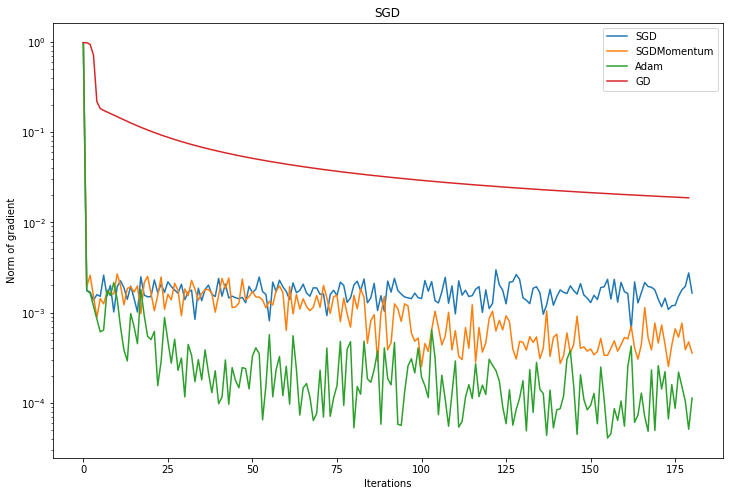

In [49]:
data = skldata.load_breast_cancer()
X = data['data']
Y = data['target']

# normaize X
X = X / X.max(axis=0)

# update X for incorporate w and b in the single vector
X = jax_numpy.c_[np.ones(X.shape[0]), X]

np.random.seed(0)
#W = jax.numpy.ones(X.shape[1]) # 
W = np.random.uniform(0, 1, X.shape[1])

def sigmoid(w, x):
    return 1 / (1 + jax_numpy.exp(-w @ x.T))

sigmoid = jax.jit(sigmoid)

def log_loss(x, y, w):
    return -1 / x.shape[0] * sum(y * jax_numpy.log(sigmoid(w, x)) \
                                 + (1 - y) * jax_numpy.log(1 - sigmoid(w, x)))

log_loss = jax.jit(log_loss)

def analitical_grad(x, y, w):
    return 1 / x.shape[0] * sum((sigmoid(w, x) - y).T @ x)

analitical_grad = jax.jit(analitical_grad)    

jax_grad = jax.jit(jax.grad(log_loss, argnums=2, has_aux=False))

def generate_batch_indexes(list_acceptable_indexes, bath_size):    
    batch_indexes = []
    count = 0
    if len(list_acceptable_indexes) < bath_size:
        bath_size = len(list_acceptable_indexes)
    while count != bath_size:
        k = np.random.randint(len(list_acceptable_indexes))
        batch_indexes.append(list_acceptable_indexes[k])
        list_acceptable_indexes.pop(k)
        count += 1
    return batch_indexes

def stoch_grad_LL(X, Y, W, list_index_in_batch):    
    zx = np.zeros((X.shape[0], X.shape[1]))
    zy = np.zeros(X.shape[0])        
    for i in list_index_in_batch:        
        zx[i][:] = X[i][:]
        # print(f'X[{i}][:] = {X[i][:]}')        
        # print(f'zx[{i}][:] = {zx[i][:]}')
        zy[i] = Y[i]        
    
    len_batch = len(list_index_in_batch)
    res = jax_grad(zx, zy, W)
    if len_batch != 0:
        res = res / len_batch
    return res
    

# stoch_grad_LL = jax.jit(stoch_grad_LL)

def SGD(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display = True):    
    if display:
        print('SGD:')
    iter = 0    
    list_norm_grad = []
    list_norm_grad.append(jax_numpy.linalg.norm(jax_grad(X, Y, W))) 
    for epoch in range(1, epochs+1):
        list_acceptable_indexes = [i for i in range(X.shape[0])]
        while len(list_acceptable_indexes) != 0:                         
            if iter == max_iters:                
                break
            batch_indexes = generate_batch_indexes(list_acceptable_indexes, bath_size)            
            len_batch = len(batch_indexes)
            if len_batch ==0:
                break            
            st_grad = stoch_grad_LL(X, Y, W, batch_indexes)                        
            norm_grad = jax.numpy.linalg.norm(st_grad)
            list_norm_grad.append(norm_grad)
            if norm_grad <= epsilon:                
                break
            iter += 1            
            W = W - lr * st_grad            
        if display:    
            print(f'Epoch - {epoch}. Gradient norm = {list_norm_grad[-1]:4f}')
    return (list_norm_grad, iter)

def SGDMomentum(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, beta = 0.9, display=True):
    if display:
        print('\nSGDMomentum:')
    iter = 0
    list_norm_grad = []
    list_norm_grad.append(jax_numpy.linalg.norm(jax_grad(X, Y, W)))
    for epoch in range(1, epochs+1):
        list_acceptable_indexes = [i for i in range(X.shape[0])]
        h = jax_numpy.zeros(X.shape[1])
        while len(list_acceptable_indexes) != 0:
            batch_indexes = generate_batch_indexes(list_acceptable_indexes, bath_size)
            st_grad = stoch_grad_LL(X, Y, W, batch_indexes)            
            norm_grad = jax_numpy.linalg.norm(st_grad)                    
            if norm_grad <= epsilon:                
                break
            if iter == max_iters:                
                break
            iter += 1
            list_norm_grad.append(norm_grad)
            h = beta * h - lr *  st_grad
            W = W + h
        if display:
            print(f'Epoch - {epoch}. Gradient norm = {list_norm_grad[-1]:4f}')
    return (list_norm_grad, iter)    

def SGDAdam(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, beta1 = 0.9, beta2 = 0.99, display=True):
    if display:
        print('\nAdam:')
    ep = 1e-4
    iter = 0
    lr = 0.2
    list_norm_grad = []
    list_norm_grad.append(jax_numpy.linalg.norm(jax_grad(X, Y, W)))
    for epoch in range(1, epochs+1):        
        list_acceptable_indexes = [i for i in range(X.shape[0])]
        V = 0
        S = 0
        while len(list_acceptable_indexes) != 0:
            batch_indexes = generate_batch_indexes(list_acceptable_indexes, bath_size)
            st_grad = stoch_grad_LL(X, Y, W, batch_indexes)            
            norm_grad = np.linalg.norm(st_grad)            
            if norm_grad <= epsilon:                
                break
            if iter == max_iters:                
                break
            iter += 1
            list_norm_grad.append(norm_grad)            
            V = beta1 * V + (1 - beta1) * st_grad
            S = beta2 * S + (1 - beta2) * (st_grad**2)                        
            Vk = V / (1 - pow(beta1, iter))
            Sk = S / (1 - pow(beta2, iter))            
            Gk = -lr * Vk / (sqrt(Sk) + ep)            
            W = W + Gk            
        if display:
            print(f'Epoch - {epoch}. Gradient norm = {list_norm_grad[-1]:4f}')
    return (list_norm_grad, iter)    


def GradientDesent(X, Y, W, alfa, epsilon, max_irerations=180, display = True):
    if display:
        print('\nGD:')
    grad =  jax_grad(X, Y, W)
    norm_grad = jax_numpy.linalg.norm(grad)
    list_norms = []    
    iter = 0
    while norm_grad > epsilon:
        if iter == max_irerations:
            break            
        else:
            list_norms.append(norm_grad)
            grad =  jax_grad(X, Y, W)
            W = W - alfa * grad
            norm_grad = jax_numpy.linalg.norm(grad)    
            iter += 1
    if display:
            print(f'Max_irerations - {max_irerations}. Gradient norm = {list_norms[-1]:4f}')        
    return (list_norms, iter)            

np.random.seed(0)
W = np.random.uniform(0, 1, X.shape[1])

epochs = 10
epsilon = 1e-6
max_iters = 1000
bath_size = 32
lr = 3
alpha = 1

list_norm_grad1, _ = SGD(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size)
list_norm_grad2, _ = SGDMomentum(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size, 0.9)
np.random.seed(0)
W = np.random.uniform(0, 1, X.shape[1])
list_norm_grad3, _ = SGDAdam(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size)
list_norm_grad4, _ = GradientDesent(X, Y, W, alpha, epsilon)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
plt.semilogy(list_norm_grad1, label=f'SGD')
plt.semilogy(list_norm_grad2, label=f'SGDMomentum')
plt.semilogy(list_norm_grad3, label=f'Adam')
plt.semilogy(list_norm_grad4, label=f'GD')
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD')
plt.show()


- (5 pts) Illustrate your conclusion by convergence plots and test different strategies of step size selection. 

# Not constant step:

In [3]:
epochs = 10
epsilon = 1e-6
max_iters = 1000
bath_size = 32

SGD:
Epoch - 1. Gradient norm = 0.002159
Epoch - 2. Gradient norm = 0.001871
Epoch - 3. Gradient norm = 0.001337
Epoch - 4. Gradient norm = 0.001996
Epoch - 5. Gradient norm = 0.001298
Epoch - 6. Gradient norm = 0.002253
Epoch - 7. Gradient norm = 0.000725
Epoch - 8. Gradient norm = 0.001789
Epoch - 9. Gradient norm = 0.002255
Epoch - 10. Gradient norm = 0.001920
SGDwithPieceWiseStep:
Epoch - 1. Gradient norm = 0.000771
Epoch - 2. Gradient norm = 0.000387
Epoch - 3. Gradient norm = 0.000573
Epoch - 4. Gradient norm = 0.000326
Epoch - 5. Gradient norm = 0.000259
Epoch - 6. Gradient norm = 0.000163
Epoch - 7. Gradient norm = 0.000226
Epoch - 8. Gradient norm = 0.000160
Epoch - 9. Gradient norm = 0.000338
Epoch - 10. Gradient norm = 0.000155


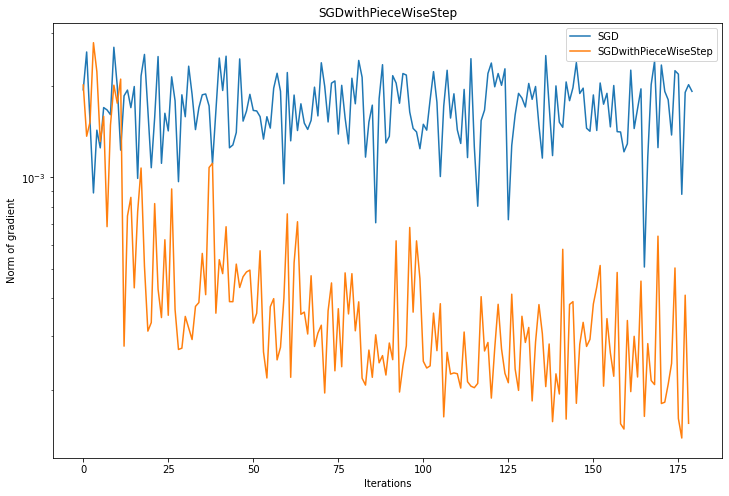

In [4]:
def SGDwithPieceWiseStep(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display = True):    
    if display:
        print('SGDwithPieceWiseStep:')
    iter = 0        
    list_norm_grad = []     
    lr = 100    
    for epoch in range(1, epochs+1):
        list_acceptable_indexes = [i for i in range(X.shape[0])]
        while len(list_acceptable_indexes) != 0:                         
            if iter == max_iters:                
                break
            batch_indexes = generate_batch_indexes(list_acceptable_indexes, bath_size)
            if len(batch_indexes) ==0:
                break
            st_grad = stoch_grad_LL(X, Y, W, batch_indexes)            
            norm_grad = jax.numpy.linalg.norm(st_grad)
            list_norm_grad.append(norm_grad)
            if norm_grad <= epsilon:                
                break
            iter += 1
            if iter > 200:
                if iter % 100 == 0:
                    lr = lr / 10
            W = W - lr * st_grad            
        if display:    
            print(f'Epoch - {epoch}. Gradient norm = {list_norm_grad[-1]:4f}')
    return (list_norm_grad, iter)

list_norm_grad1, _ = SGD(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size)
list_norm_grad11, _ = SGDwithPieceWiseStep(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
plt.semilogy(list_norm_grad1[1:], label=f'SGD')
plt.semilogy(list_norm_grad11[1:], label=f'SGDwithPieceWiseStep')
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDwithPieceWiseStep')
plt.show()

SGD:
Epoch - 1. Gradient norm = 0.001324
Epoch - 2. Gradient norm = 0.002119
Epoch - 3. Gradient norm = 0.001809
Epoch - 4. Gradient norm = 0.001468
Epoch - 5. Gradient norm = 0.001832
Epoch - 6. Gradient norm = 0.002026
Epoch - 7. Gradient norm = 0.002221
Epoch - 8. Gradient norm = 0.001884
Epoch - 9. Gradient norm = 0.000942
Epoch - 10. Gradient norm = 0.001382
SGDwithPieceWiseStep:
Epoch - 1. Gradient norm = 0.000657
Epoch - 2. Gradient norm = 0.001072
Epoch - 3. Gradient norm = 0.000351
Epoch - 4. Gradient norm = 0.000284
Epoch - 5. Gradient norm = 0.000248
Epoch - 6. Gradient norm = 0.000321
Epoch - 7. Gradient norm = 0.000346
Epoch - 8. Gradient norm = 0.000158
Epoch - 9. Gradient norm = 0.000487
Epoch - 10. Gradient norm = 0.000236


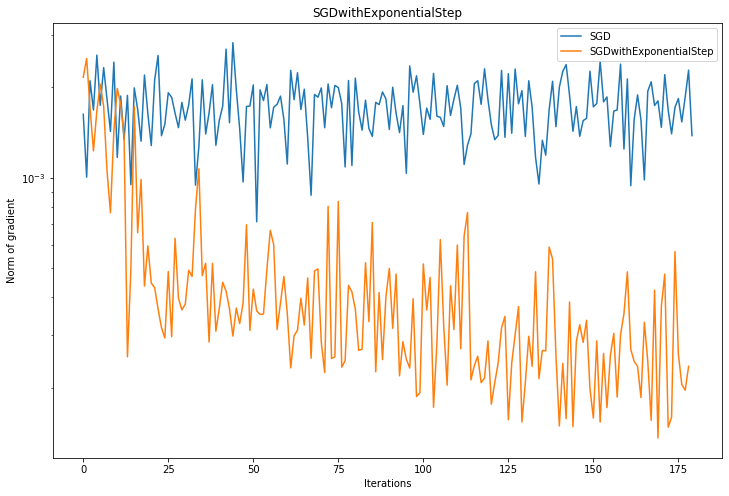

In [5]:
def SGDwithExponentialStep(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display = True):    
    if display:
        print('SGDwithPieceWiseStep:')
    iter = 0
    lr = 100    
    c = 0.1
    list_norm_grad = []     
    for epoch in range(1, epochs+1):
        list_acceptable_indexes = [i for i in range(X.shape[0])]
        while len(list_acceptable_indexes) != 0:                         
            if iter == max_iters:                
                break
            batch_indexes = generate_batch_indexes(list_acceptable_indexes, bath_size)
            if len(batch_indexes) ==0:
                break
            st_grad = stoch_grad_LL(X, Y, W, batch_indexes)            
            norm_grad = jax.numpy.linalg.norm(st_grad)
            list_norm_grad.append(norm_grad)
            if norm_grad <= epsilon:                
                break
            iter += 1
            if iter > 500:
                lr *= jax.numpy.exp(-c*iter)
            W = W - lr * st_grad            
        if display:    
            print(f'Epoch - {epoch}. Gradient norm = {list_norm_grad[-1]:4f}')
    return (list_norm_grad, iter)

list_norm_grad1, _ = SGD(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size)
list_norm_grad21, _ = SGDwithExponentialStep(X, Y, np.copy(W), lr, epochs, epsilon, max_iters, bath_size)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
plt.semilogy(list_norm_grad1[1:], label=f'SGD')
plt.semilogy(list_norm_grad21[1:], label=f'SGDwithExponentialStep')
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDwithExponentialStep')
plt.show()

# SGD with different step(learning rate)

In [6]:
epochs = 5
epsilon = 1e-4
max_iters = 1000
bath_size = 32
lr = 10

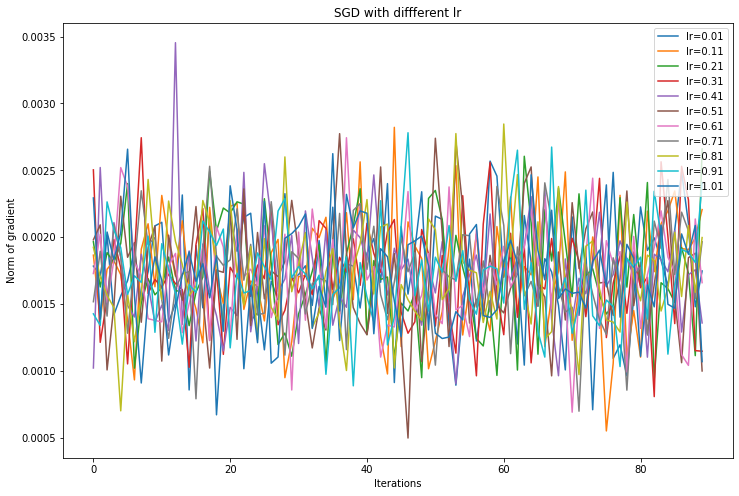

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(1, 111, 10):
    list, _ = SGD(X, Y, np.copy(W), lr/100, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr/100}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD with diffferent lr')
plt.show()

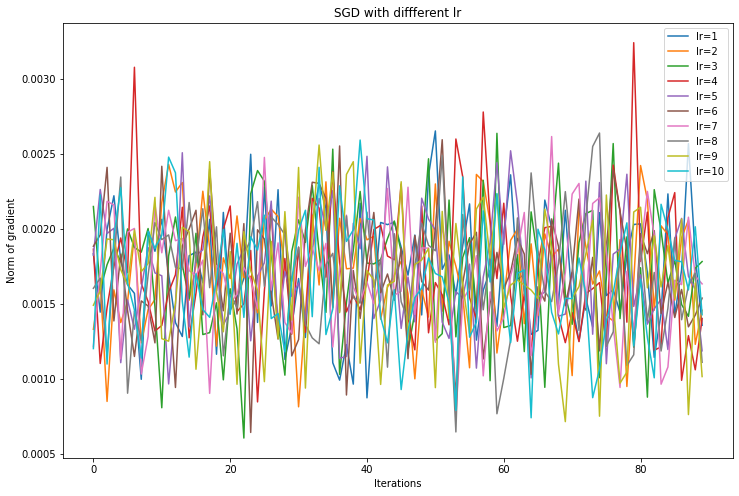

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(1, 11, 1):
    list, _ = SGD(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD with diffferent lr')
plt.show()

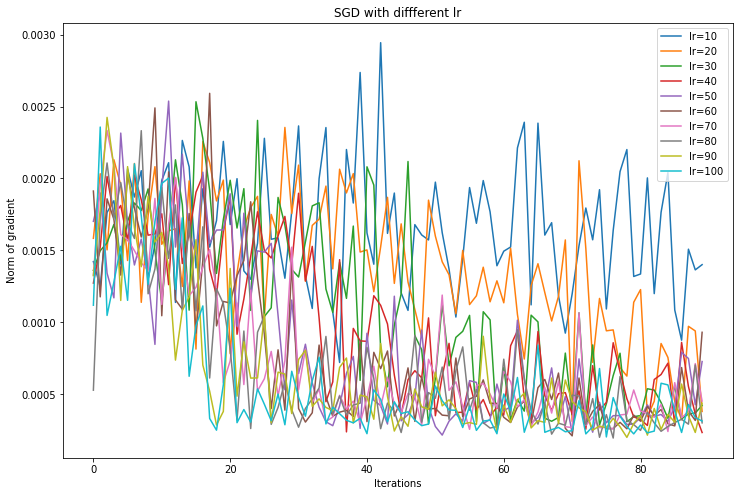

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(10, 101, 10):
    list, _ = SGD(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD with diffferent lr')
plt.show()

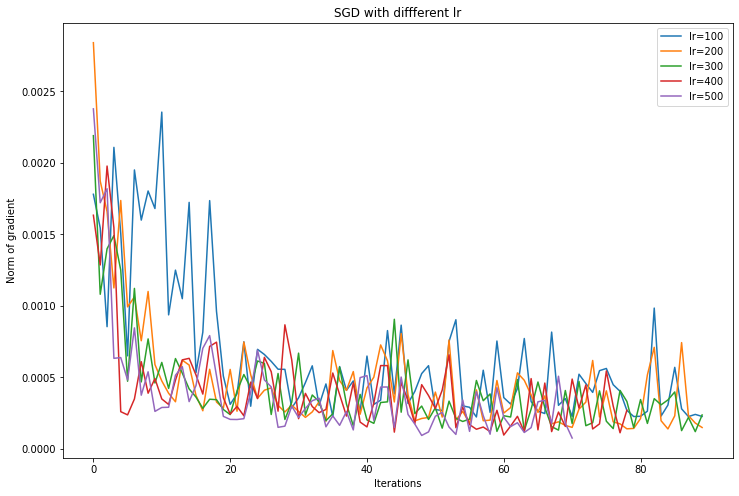

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(100, 501, 100):
    list, _ = SGD(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD with diffferent lr')
plt.show()

# SGD Momentum - with different step(learning rate)

In [11]:
epochs = 5
epsilon = 1e-4
max_iters = 1000
bath_size = 32

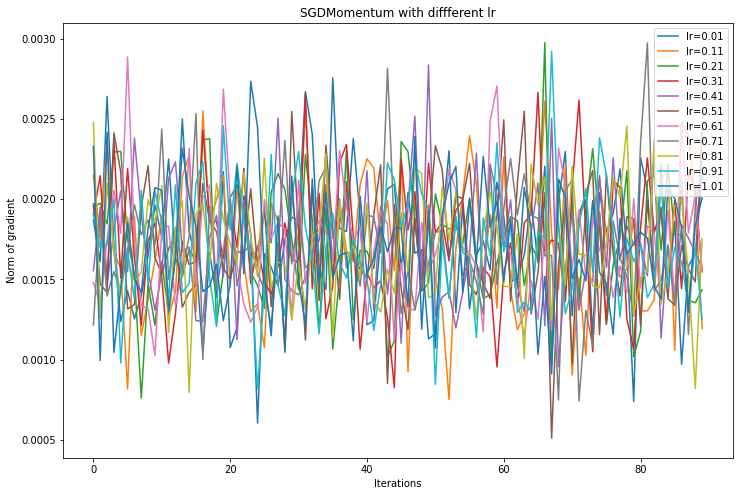

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(1, 111, 10):
    list, _ = SGDMomentum(X, Y, W, lr/100, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr/100}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDMomentum with diffferent lr')
plt.show()

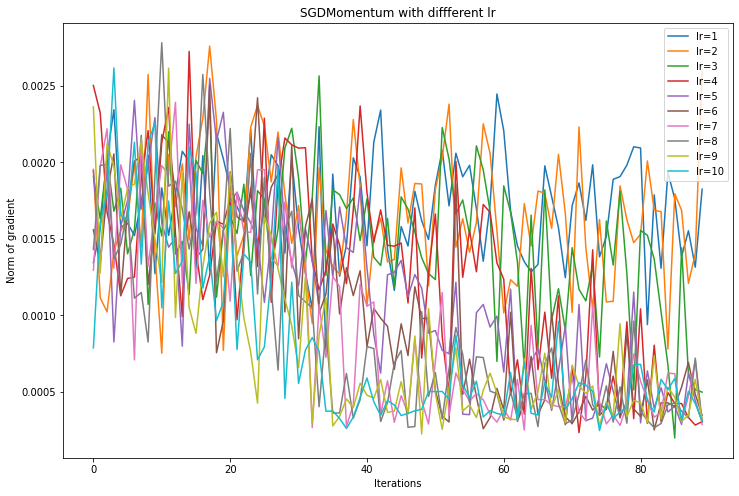

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(1, 11, 1):
    list, _ = SGDMomentum(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDMomentum with diffferent lr')
plt.show()

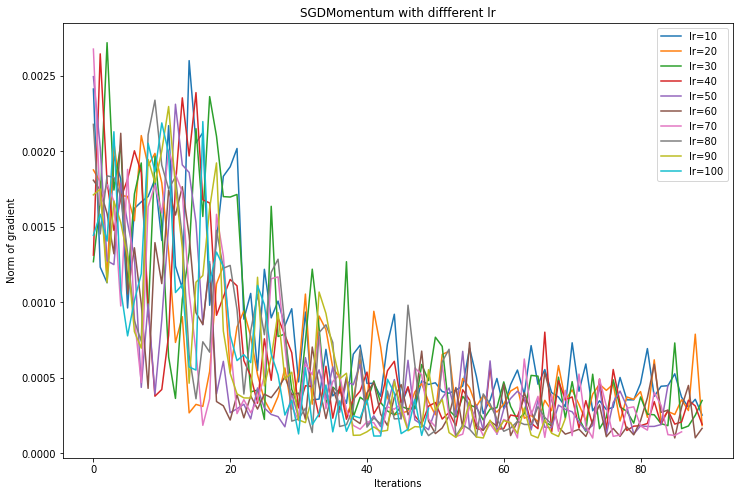

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(10, 101, 10):
    list, _ = SGDMomentum(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDMomentum with diffferent lr')
plt.show()

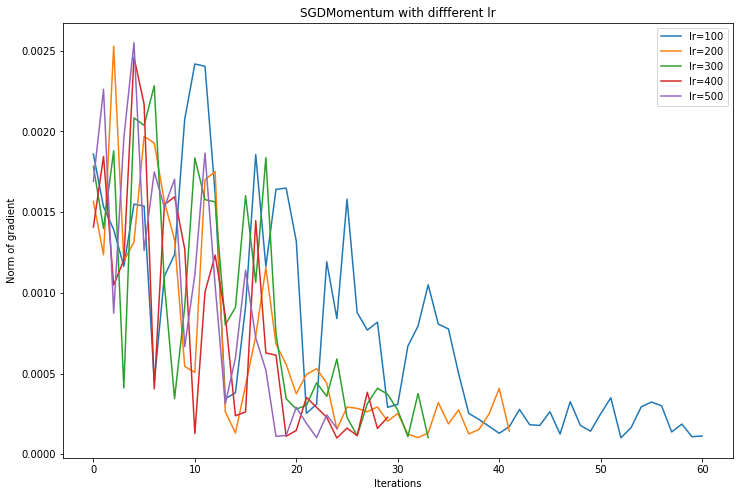

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for lr in range(100, 501, 100):
    list, _ = SGDMomentum(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'lr={lr}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDMomentum with diffferent lr')
plt.show()

- (5 pts) Test different batch sizes and conclude the effect on gradient variance and convergence speed

# SGD & SGD Momentum & Adam with different bath size

In [16]:
epochs = 10
epsilon = 1e-4
max_iters = 1000
bath_size = 32
lr = 50

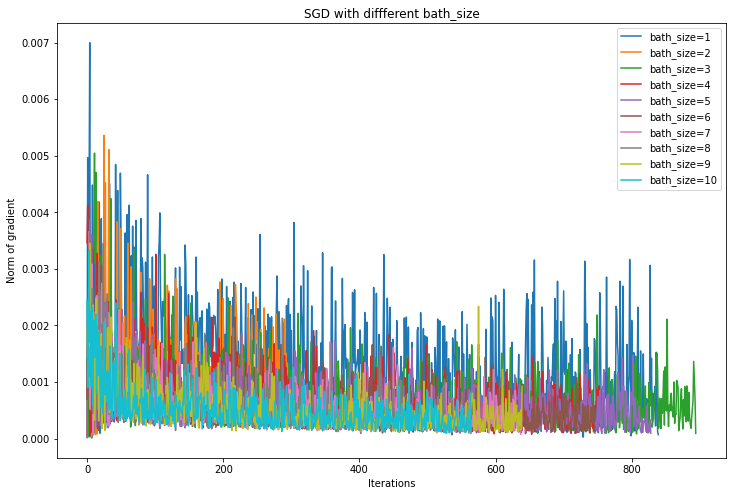

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for bath_size in range(1, 11, 1):
    list, _ = SGD(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD with diffferent bath_size')
plt.show()

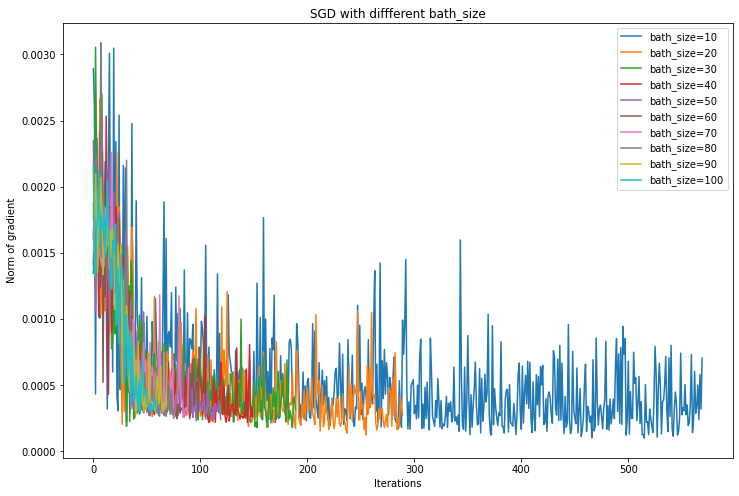

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for bath_size in range(10, 101, 10):
    list, _ = SGD(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGD with diffferent bath_size')
plt.show()

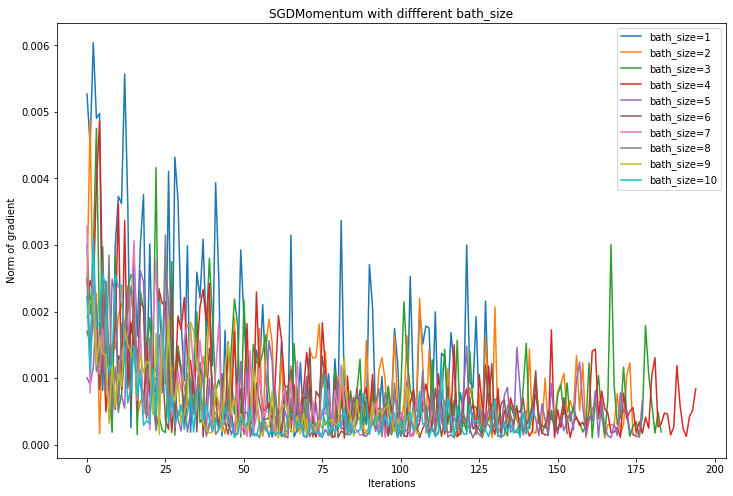

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for bath_size in range(1, 11, 1):
    list, _ = SGDMomentum(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDMomentum with diffferent bath_size')
plt.show()

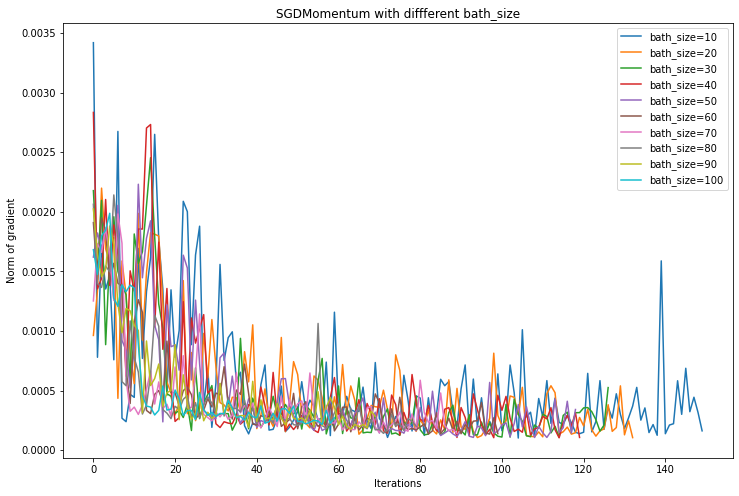

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for bath_size in range(10, 101, 10):
    list, _ = SGDMomentum(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDMomentum with diffferent bath_size')
plt.show()

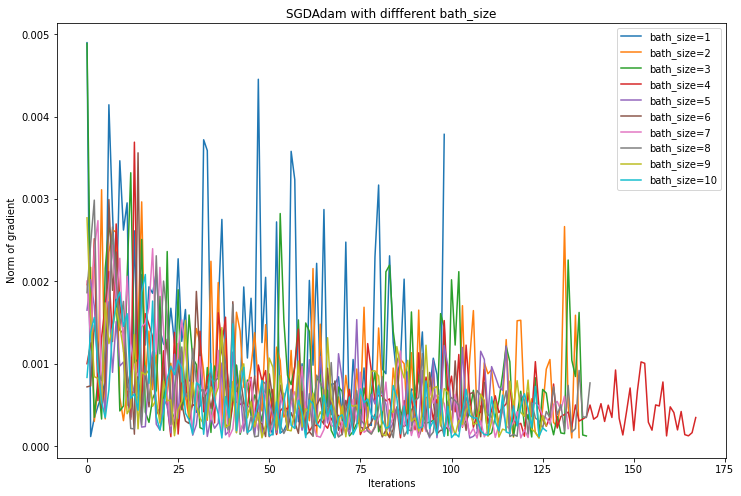

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
lr = 0.2
for bath_size in range(1, 11, 1):
    list, _ = SGDAdam(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDAdam with diffferent bath_size')
plt.show()

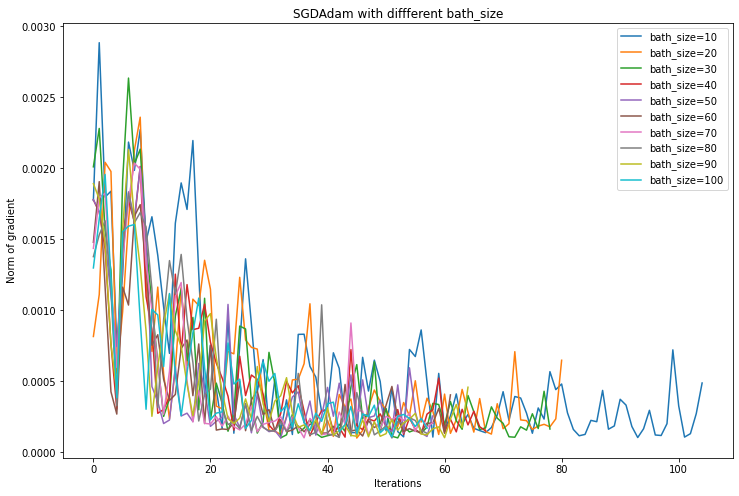

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for bath_size in range(10, 101, 10):
    list, _ = SGDAdam(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
    plt.plot(list[1:], label=f'bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDAdam with diffferent bath_size')
plt.show()

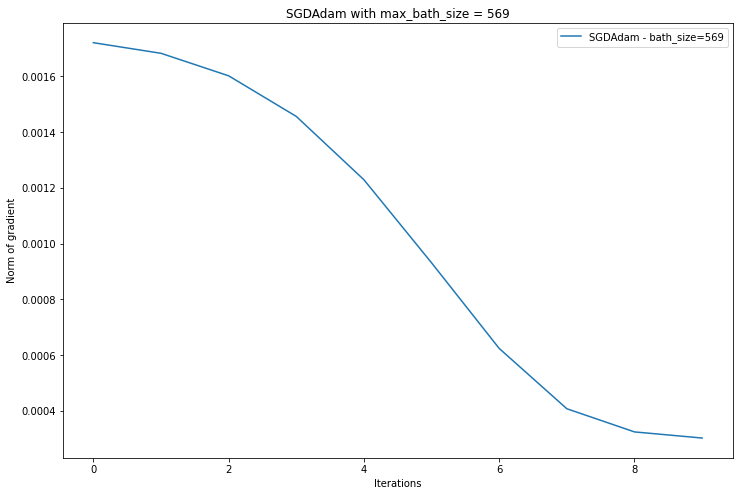

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
bath_size=569
epochs = 10
listA, _ = SGDAdam(X, Y, W, lr, epochs, epsilon, max_iters, bath_size, display=False)
plt.plot(listA[1:], label=f'SGDAdam - bath_size={bath_size}')

plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('SGDAdam with max_bath_size = 569')
plt.show()

## Problem 2 (8 pts)

Consider the following optimization problem

$$
\min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
$$

- (2 pts) Compare convergence of gradient descent, non-linear conjugate gradient method from ```scipy.optimize``` package, heavy ball method and accelerated gradient method in solving this problem if the gradient norm is used as a measure of convergence 

- (4 pts) What procedure to select the step size gives the fastest convergence for every method? Consider any three strategies for every of the following method: gradient descent, heavy ball method and accelerated gradient method. For example, constant, decreasing sequence, some adaptive rule. In the latter case, think how you can adapt the Armijo rule (or similar rules) for heavy ball and accelerated gradient method.
- (2 pts) Consider different dimensions $m$ and $n$ ($m > n$ and $m < n$). Vectors $a_i$ and $b$ can be generated from the standard normal distribution.

Note that the stable way to compute the objective and gradient is crucial to solve this problem successfully, otherwise you will get NaN values in vector $x_k$ since the intermediate values for the sum of large exponent overflow the capacity of the ```double``` precision.

# My solution:

In [24]:
import jax
import jax.numpy as jax_numpy
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import show_options

m = 100
n = 1

np.random.seed(10)
A = np.random.uniform(0, 1, (m, n))
B = np.random.uniform(0, 1, m)
X2 = np.random.uniform(0, 1, n)

def cost_func(X):
    return jax.numpy.log(sum(jax.numpy.exp(A @ X + B)))

cost_func = jax.jit(cost_func)


def logsumexp(x):
    c = jax.numpy.max(x)
    return c + jax.numpy.log(jax.numpy.sum(jax.numpy.exp(x - c)))

def tricked_exp(x):
    return jax.numpy.exp(x - logsumexp(x))


jax_grad_cost = jax.jit(jax.grad(cost_func, argnums=0, has_aux=False))


def solver(x0, f, f_prime, method="CG", iter=1000):        
    norms=[]
    def store(X):
        grad = f_prime(X)
        norms.append(jax.numpy.linalg.norm(grad))
    res = optimize.minimize(f, x0, method=method, jac=f_prime, callback=store, options={'gtol': 1e-6, 'disp': True, 'iter' : 10000})
    print(f'res = {res}')
    return norms


GD:
Max_irerations - 200. Gradient norm = 0.047031


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: OptimizeWarning: Unknown solver options: iter


         Current function value: -3.243314
         Iterations: 200
         Function evaluations: 21883
         Gradient evaluations: 21883
res =      fun: DeviceArray(-3.243314, dtype=float32)
     jac: DeviceArray([0.00394827], dtype=float32)
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 21883
     nit: 200
    njev: 21883
  status: 1
 success: False
       x: DeviceArray([-992.0256], dtype=float32)


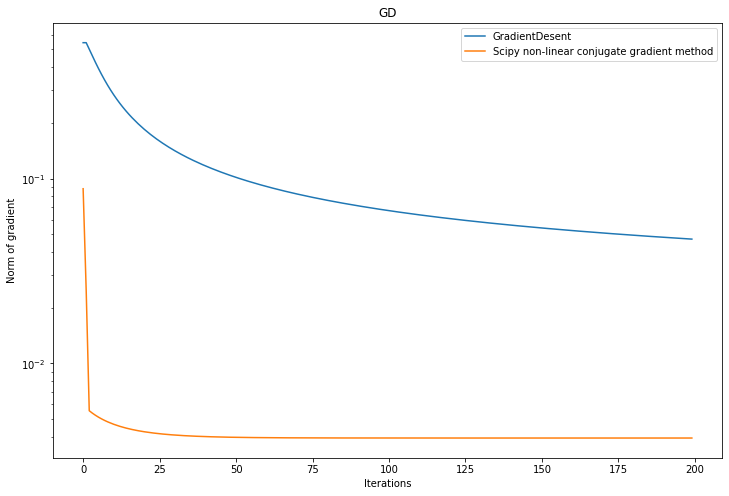

In [25]:
def GradientDesent(X, alfa, epsilon, max_irerations=10000, display = True):
    if display:
        print('\nGD:')
    grad =  jax_grad_cost(X2)
    norm_grad = jax_numpy.linalg.norm(grad)
    list_norms = []    
    iter = 0
    while norm_grad > epsilon:
        if iter == max_irerations:
            break            
        else:
            list_norms.append(norm_grad)
            grad =  jax_grad_cost(X)
            X = X - alfa * grad
            norm_grad = jax_numpy.linalg.norm(grad)    
            iter += 1
    if display:
            print(f'Max_irerations - {max_irerations}. Gradient norm = {list_norms[-1]:4f}')        
    return (list_norms, iter)            

alpha = 1
epsilon = 1e-4
max_irerations = 200

list_norm_gradGD, _ = GradientDesent(X2, alpha, epsilon, max_irerations)
normsNLCGMScipy = solver(X2, cost_func, jax_grad_cost, method="CG")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
plt.semilogy(list_norm_gradGD, label=f'GradientDesent')
plt.semilogy(normsNLCGMScipy, label=f'Scipy non-linear conjugate gradient method')
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('GD')
plt.show()

In [26]:
!pip install git+https://github.com/amkatrutsa/liboptpy

  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-2_f6jzl5
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-2_f6jzl5
  Created wheel for liboptpy: filename=liboptpy-0.0.1-py3-none-any.whl size=12866 sha256=3867ca3f9c8077a45fbf1f17f154aaaa20bb2ccc37a2b91c6b38292171b8d3ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-32y5dvm3/wheels/ab/74/bb/5e8e0b3a8bfb0f7217acf303a3d150d461d1b55f7d97519d7d
Successfully built liboptpy


In [27]:
import liboptpy.base_optimizer as base
import numpy as np
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

In [28]:
f = cost_func
grad = jax_grad_cost
alpha_opt = 0.022
beta_opt = 0.94

methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(0.1)), 
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    "HB": HeavyBall(f, grad, ss.ConstantStepSize(0.8), beta=0.9), 
    "HB optimal": HeavyBall(f, grad, ss.ConstantStepSize(1), beta = beta_opt), 
}

max_iter = 2000
tol = 1e-6

In [29]:
for m in methods:
    _ = methods[m].solve(x0=X2, max_iter=max_iter, tol=tol)

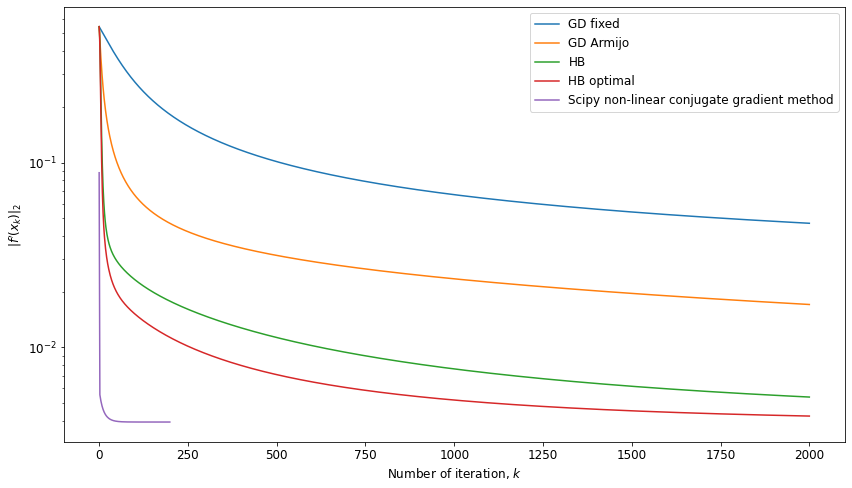

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=False)

figsize = (14, 8)
fontsize = 12
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.semilogy(normsNLCGMScipy, label=f'Scipy non-linear conjugate gradient method')
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)

# Cocnclusion:

As we can see, under these initial conditions, faster convergence is provided by the Scipy nonlinear conjugate gradient method.
The slowest method, as expected, is the usual gradient descent, followed by a gradient descent with a fixed step according to the convergence rate. A better convergence is shown by gradient descent with the Armiho rule. The best results are obtained by methods with a heavy ball, which are outstripped only by the method of nonlinear conjugate gradient scipy.



# And last point:

- (2 pts) Consider different dimensions $m$ and $n$ ($m > n$ and $m < n$). Vectors $a_i$ and $b$ can be generated from the standard normal distribution.


In [31]:
import jax
import jax.numpy as jax_numpy
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import show_options

m = 10
n = 100

np.random.seed(0)
A = np.random.uniform(0, 1, (m, n))
B = np.random.uniform(0, 1, m)
X2 = np.random.uniform(0, 1, n)

def cost_func(X):
    return jax.numpy.log(sum(jax.numpy.exp(A @ X + B)))

cost_func = jax.jit(cost_func)

jax_grad_cost = jax.jit(jax.grad(cost_func, argnums=0, has_aux=False))


def logsumexp(x):
    c = jax.numpy.max(x)
    return c + jax.numpy.log(jax.numpy.sum(jax.numpy.exp(x - c)))

def tricked_exp(x):
    return jax.numpy.exp(x - logsumexp(x))

jax_grad_logsumexp = jax.jit(jax.grad(logsumexp, argnums=0, has_aux=False))

f = logsumexp
grad = jax_grad_logsumexp
alpha_opt = 0.022
beta_opt = 0.94

max_iter = 100
tol = 1e-6

methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(0.1)), 
    "GD Armijo": fo.GradientDescent(f, grad, 
            ss.Backtracking("Armijo", rho=0.5, beta=0.1, init_alpha=1.)),
    "HB": HeavyBall(f, grad, ss.ConstantStepSize(0.8), beta=0.9)
}

for m in methods:
    _ = methods[m].solve(x0=tricked_exp(X2), max_iter=max_iter, tol=tol)

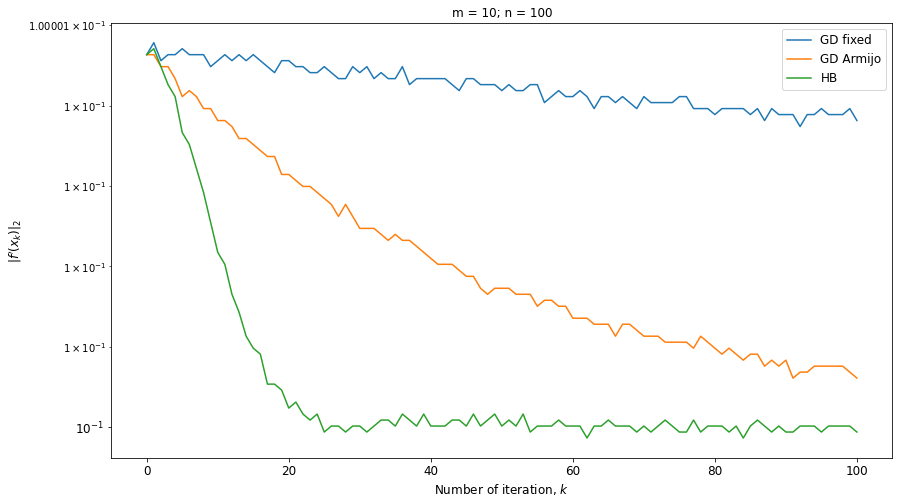

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=False)

figsize = (14, 8)
fontsize = 12
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
# plt.legend(loc=1)
plt.title('m = 10; n = 100')
_ = plt.yticks(fontsize=fontsize)

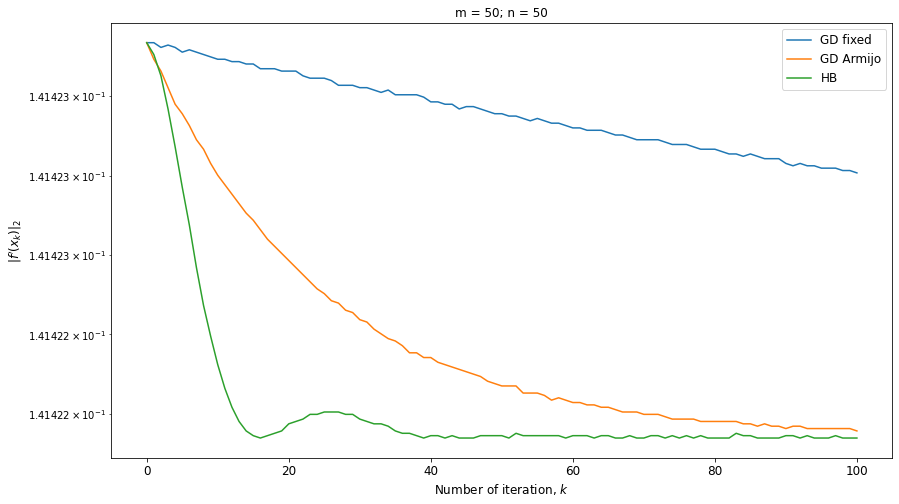

In [33]:
m = 50
n = 50

np.random.seed(0)
A = np.random.uniform(0, 1, (m, n))
B = np.random.uniform(0, 1, m)
X2 = np.random.uniform(0, 1, n)

for m in methods:
    _ = methods[m].solve(x0=tricked_exp(X2), max_iter=max_iter, tol=tol)

figsize = (14, 8)
fontsize = 12
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.title('m = 50; n = 50')
_ = plt.yticks(fontsize=fontsize)    

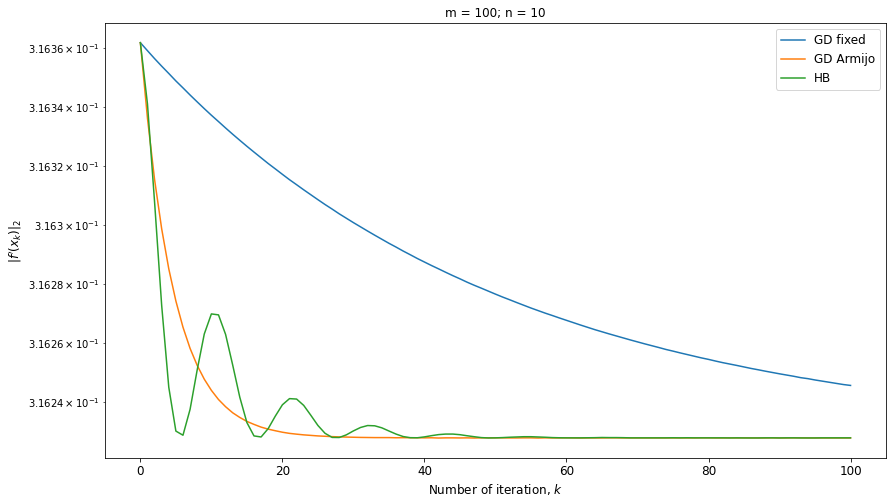

In [34]:
m = 100
n = 10

np.random.seed(0)
A = np.random.uniform(0, 1, (m, n))
B = np.random.uniform(0, 1, m)
X2 = np.random.uniform(0, 1, n)

for m in methods:
    _ = methods[m].solve(x0=tricked_exp(X2), max_iter=max_iter, tol=tol)

figsize = (14, 8)
fontsize = 12
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.title('m = 100; n = 10')
_ = plt.yticks(fontsize=fontsize)    

# About:


Note that the stable way to compute the objective and gradient is crucial to solve this problem successfully, otherwise you will get NaN values in vector $x_k$ since the intermediate values for the sum of large exponent overflow the capacity of the ```double``` precision.


**For solving this problem I use this trick:**

(https://gregorygundersen.com/blog/2020/02/09/log-sum-exp/)

In [35]:
def logsumexp(x):
    c = jax.numpy.max(x)
    return c + jax.numpy.log(jax.numpy.sum(jax.numpy.exp(x - c)))

def tricked_exp(x):
    return jax.numpy.exp(x - logsumexp(x))